In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [29]:
data = pd.read_csv('plants data - lavender .csv')

In [30]:
data

,plant_name,temp,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m)
0,lavender,20,1.2,14,60,40,0,45,6.8,2,moderate,1.2-1.5,1.5–2.0,12,85.0,NaN
1,lavender,20,1.2,12,70,30,0,45,6.8,2,moderate,0.8-1.2,1.3–1.8,12,82.0,NaN
2,lavender,20,1.2,14,50,40,10,45,6.8,2,moderate,1.3-1.6,1.4–1.9,12,85.0,NaN
3,lavender,20,1.2,16,65,36,0,45,6.8,2,moderate,1.4-1.8,1.6–2.1,12,85.0,NaN
4,lavender,20,1.2,12,60,40,0,45,6.8,2,moderate,1.0-1.4,NaN,12,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,22,1.2,16,50,35,5,60,6,3,high,0.4,1.5,5,NaN,NaN
76,lavender,23,1.3,17,52,30,4,65,6.2,2,moderate,0.5,1.5,4,NaN,NaN
77,lavender,25,1.4,16,53,33,5,58,6.3,4,low,0.5,1.6,5,NaN,NaN
78,lavender,23,1.2,16,50,32,6,60,6,3,high,0.5,1.5,4,NaN,NaN


In [51]:
data.drop('life cycle (m)',axis=1,inplace=True)

# procession

In [31]:
# plants name done
# temp
data.temp.unique()

array(['20', '18-22', '22-27', '20-24', '19-23', '22-26', '22-25',
       '20-23\t', '20-26\t', '18-27\t', '21-26', '20-25', '21-23',
       '19-25', '18-26', '21-25', '18-24', '18-25', '20-26', '20-23',
       '21-24', '22', '24', '23', '25', '21', '26'], dtype=object)

In [32]:
# delete the \t and get the extract n-n
data.temp=data.temp.apply(lambda x:x.replace('\t',''))
data['temp'].unique()

array(['20', '18-22', '22-27', '20-24', '19-23', '22-26', '22-25',
       '20-23', '20-26', '18-27', '21-26', '20-25', '21-23', '19-25',
       '18-26', '21-25', '18-24', '18-25', '21-24', '22', '24', '23',
       '25', '21', '26'], dtype=object)

In [33]:

# Extract temperature ranges and absolute values using regex
temp_ranges = data['temp'].str.extract(r'(\d+)-(\d+)')  # Extract ranges
temp_absolutes = data['temp'][~data['temp'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['temp_min'] = pd.to_numeric(temp_ranges[0], errors='coerce')  # Convert to numeric
data['temp_max'] = pd.to_numeric(temp_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['temp_min'].isnull(), ['temp_min', 'temp_max']] =  pd.DataFrame({'temp_min':temp_absolutes.tolist(), 'temp_max':temp_absolutes.tolist()})


for index, row in data.iterrows():
    if pd.isnull(row['temp_min']) and pd.isnull(row['temp_max']):
        data.loc[index, 'temp_min'] = row['temp']
        data.loc[index, 'temp_max'] = row['temp']
data

<ipython-input-33-e1c3c012a6d6>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'temp_min'] = row['temp']
<ipython-input-33-e1c3c012a6d6>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'temp_max'] = row['temp']


,plant_name,temp,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m),temp_min,temp_max
0,lavender,20,1.2,14,60,40,0,45,6.8,2,moderate,1.2-1.5,1.5–2.0,12,85.0,NaN,20.0,20.0
1,lavender,20,1.2,12,70,30,0,45,6.8,2,moderate,0.8-1.2,1.3–1.8,12,82.0,NaN,20.0,20.0
2,lavender,20,1.2,14,50,40,10,45,6.8,2,moderate,1.3-1.6,1.4–1.9,12,85.0,NaN,20.0,20.0
3,lavender,20,1.2,16,65,36,0,45,6.8,2,moderate,1.4-1.8,1.6–2.1,12,85.0,NaN,20.0,20.0
4,lavender,20,1.2,12,60,40,0,45,6.8,2,moderate,1.0-1.4,NaN,12,85.0,NaN,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,22,1.2,16,50,35,5,60,6,3,high,0.4,1.5,5,NaN,NaN,22,22
76,lavender,23,1.3,17,52,30,4,65,6.2,2,moderate,0.5,1.5,4,NaN,NaN,23,23
77,lavender,25,1.4,16,53,33,5,58,6.3,4,low,0.5,1.6,5,NaN,NaN,25,25
78,lavender,23,1.2,16,50,32,6,60,6,3,high,0.5,1.5,4,NaN,NaN,23,23


In [34]:
data.drop('temp',axis=1,inplace=True)


In [35]:
# EC
data['EC ds/m'] = data['EC ds/m'].str.replace('c', '', case=False)

# Extract temperature ranges and absolute values using regex
ec_ranges = data['EC ds/m'].str.extract(r'(\d+\.?\d+)-(\d+\.?\d+)')  # Extract ranges
ec_absolutes = data['EC ds/m'][~data['EC ds/m'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['EC_min'] = pd.to_numeric(ec_ranges[0], errors='coerce')  # Convert to numeric
data['EC_max'] = pd.to_numeric(ec_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['EC_min'].isnull(), ['EC_min', 'EC_max']] =  pd.DataFrame({'EC_min':ec_absolutes.tolist(), 'EC_max':ec_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['EC_min']) and pd.isnull(row['EC_max']):
        data.loc[index, 'EC_min'] = row['EC ds/m']
        data.loc[index, 'EC_max'] = row['EC ds/m']
data

<ipython-input-35-61f3ed9ac58a>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'EC_min'] = row['EC ds/m']
<ipython-input-35-61f3ed9ac58a>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'EC_max'] = row['EC ds/m']


,plant_name,EC ds/m,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m),temp_min,temp_max,EC_min,EC_max
0,lavender,1.2,14,60,40,0,45,6.8,2,moderate,1.2-1.5,1.5–2.0,12,85.0,NaN,20.0,20.0,1.2,1.2
1,lavender,1.2,12,70,30,0,45,6.8,2,moderate,0.8-1.2,1.3–1.8,12,82.0,NaN,20.0,20.0,1.2,1.2
2,lavender,1.2,14,50,40,10,45,6.8,2,moderate,1.3-1.6,1.4–1.9,12,85.0,NaN,20.0,20.0,1.2,1.2
3,lavender,1.2,16,65,36,0,45,6.8,2,moderate,1.4-1.8,1.6–2.1,12,85.0,NaN,20.0,20.0,1.2,1.2
4,lavender,1.2,12,60,40,0,45,6.8,2,moderate,1.0-1.4,NaN,12,85.0,NaN,20.0,20.0,1.2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,1.2,16,50,35,5,60,6,3,high,0.4,1.5,5,NaN,NaN,22,22,1.2,1.2
76,lavender,1.3,17,52,30,4,65,6.2,2,moderate,0.5,1.5,4,NaN,NaN,23,23,1.3,1.3
77,lavender,1.4,16,53,33,5,58,6.3,4,low,0.5,1.6,5,NaN,NaN,25,25,1.4,1.4
78,lavender,1.2,16,50,32,6,60,6,3,high,0.5,1.5,4,NaN,NaN,23,23,1.2,1.2


In [36]:
data.drop('EC ds/m',axis=1,inplace=True)

In [37]:
# light_time_day
data['light_time_day'].unique() # light_time_day is done
# red light and blue light done , far red done

array([14, 12, 16, 10, 15, 18, 17])

In [38]:
# humidity
data['humidity '].unique()
data['humidity '] = data['humidity ' ].str.replace('%', '', case=False)

# Extract temperature ranges and absolute values using regex
humidity_ranges = data['humidity '].str.extract(r'(\d+)-(\d+)')  # Extract ranges
humidity_absolutes = data['humidity '][~data['humidity '].str.contains('-')].astype(float)  # Extract absolutes

# Create humidity_min and humidity_max columns
data['humidity_min'] = pd.to_numeric(humidity_ranges[0], errors='coerce')  # Convert to numeric
data['humidity_max'] = pd.to_numeric(humidity_ranges[1], errors='coerce')

# Fill missing values in humidity_min and humidity_max with absolutes
data.loc[data['humidity_min'].isnull(), ['humidity_min', 'humidity_max']] =  pd.DataFrame({'humidity_min':humidity_absolutes.tolist(), 'humidity_max':humidity_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['humidity_min']) and pd.isnull(row['humidity_max']):
        data.loc[index, 'humidity_min'] = row['humidity ']
        data.loc[index, 'humidity_max'] = row['humidity ']

data

<ipython-input-38-d55dfe8970e7>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'humidity_min'] = row['humidity ']
<ipython-input-38-d55dfe8970e7>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'humidity_max'] = row['humidity ']


,plant_name,light_time_day,red_light,blue_light,far_red,humidity,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max
0,lavender,14,60,40,0,45,6.8,2,moderate,1.2-1.5,1.5–2.0,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0
1,lavender,12,70,30,0,45,6.8,2,moderate,0.8-1.2,1.3–1.8,12,82.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0
2,lavender,14,50,40,10,45,6.8,2,moderate,1.3-1.6,1.4–1.9,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0
3,lavender,16,65,36,0,45,6.8,2,moderate,1.4-1.8,1.6–2.1,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0
4,lavender,12,60,40,0,45,6.8,2,moderate,1.0-1.4,NaN,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,60,6,3,high,0.4,1.5,5,NaN,NaN,22,22,1.2,1.2,60,60
76,lavender,17,52,30,4,65,6.2,2,moderate,0.5,1.5,4,NaN,NaN,23,23,1.3,1.3,65,65
77,lavender,16,53,33,5,58,6.3,4,low,0.5,1.6,5,NaN,NaN,25,25,1.4,1.4,58,58
78,lavender,16,50,32,6,60,6,3,high,0.5,1.5,4,NaN,NaN,23,23,1.2,1.2,60,60


In [39]:
data.drop('humidity ',axis=1,inplace=True)

In [40]:
# ph
data['ph'].unique()

data['ph'] = data['ph'].str.replace('c', '', case=False)

# Extract temperature ranges and absolute values using regex
ph_ranges = data['ph'].str.extract(r'(\d+)-(\d+)')  # Extract ranges
ph_absolutes = data['ph'][~data['ph'].str.contains('-')].astype(float)  # Extract absolutes

# Create temp_min and temp_max columns
data['ph_min'] = pd.to_numeric(ph_ranges[0], errors='coerce')  # Convert to numeric
data['ph_max'] = pd.to_numeric(ph_ranges[1], errors='coerce')

# Fill missing values in temp_min and temp_max with absolutes
data.loc[data['ph_min'].isnull(), ['ph_min', 'ph_max']] =  pd.DataFrame({'ph_min':ph_absolutes.tolist(), 'ph_max':ph_absolutes.tolist()})

for index, row in data.iterrows():
    if pd.isnull(row['ph_min']) and pd.isnull(row['ph_max']):
        data.loc[index, 'ph_min'] = row['ph']
        data.loc[index, 'ph_max'] = row['ph']
data

<ipython-input-40-3acb31a5e731>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'ph_min'] = row['ph']
<ipython-input-40-3acb31a5e731>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'ph_max'] = row['ph']


,plant_name,light_time_day,red_light,blue_light,far_red,ph,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),...,accuracy,life cycle (m),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,6.8,2,moderate,1.2-1.5,1.5–2.0,...,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,6.8,2,moderate,0.8-1.2,1.3–1.8,...,82.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,6.8,2,moderate,1.3-1.6,1.4–1.9,...,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,6.8,2,moderate,1.4-1.8,1.6–2.1,...,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,6.8,2,moderate,1.0-1.4,NaN,...,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,6,3,high,0.4,1.5,...,NaN,NaN,22,22,1.2,1.2,60,60,6.2,6.2
76,lavender,17,52,30,4,6.2,2,moderate,0.5,1.5,...,NaN,NaN,23,23,1.3,1.3,65,65,6.2,6.2
77,lavender,16,53,33,5,6.3,4,low,0.5,1.6,...,NaN,NaN,25,25,1.4,1.4,58,58,6.3,6.3
78,lavender,16,50,32,6,6,3,high,0.5,1.5,...,NaN,NaN,23,23,1.2,1.2,60,60,6,6


In [41]:
data.drop('ph',axis=1,inplace=True)

In [45]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.2-1.5,1.5-2.0,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,0.8-1.2,1.3-1.8,12,82.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.3-1.6,1.4-1.9,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.4-1.8,1.6-2.1,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.0-1.4,nan,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,3,high,0.4,1.5,5,NaN,NaN,22,22,1.2,1.2,60,60,6.2,6.2
76,lavender,17,52,30,4,2,moderate,0.5,1.5,4,NaN,NaN,23,23,1.3,1.3,65,65,6.2,6.2
77,lavender,16,53,33,5,4,low,0.5,1.6,5,NaN,NaN,25,25,1.4,1.4,58,58,6.3,6.3
78,lavender,16,50,32,6,3,high,0.5,1.5,4,NaN,NaN,23,23,1.2,1.2,60,60,6,6


In [44]:
data['Active Agents (%)']=data['Active Agents (%)'].apply(lambda x:str(x).replace('–','-'))

In [46]:
# growth yied
def calculate_mean(value):
    if '-' in str(value):
        try:
            # Split the value by '-' and convert to numbers
            numbers = [float(num) for num in value.split('-')]
            # Calculate the mean
            mean_value = np.mean(numbers)
            return mean_value
        except ValueError:
            # Handle cases where the value is not in the expected format
            return value  # Or handle it differently based on your needs
    else:
        try:
            return float(value)  # Convert single numbers to floats
        except ValueError:
            return value  # Or handle it differently based on your needs

# Apply the function to the 'growth_yield/m^2 (kg)' column
data['growth_yield/m^2 (kg)'] = data['growth_yield/m^2 (kg)'].apply(calculate_mean)

data['Active Agents (%)'] = data['Active Agents (%)'].apply(calculate_mean)




In [47]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,life cycle (m),temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.35,1.75,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.00,1.55,12,82.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.45,1.65,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.60,1.85,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,NaN,12,85.0,NaN,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,3,high,0.40,1.50,5,NaN,NaN,22,22,1.2,1.2,60,60,6.2,6.2
76,lavender,17,52,30,4,2,moderate,0.50,1.50,4,NaN,NaN,23,23,1.3,1.3,65,65,6.2,6.2
77,lavender,16,53,33,5,4,low,0.50,1.60,5,NaN,NaN,25,25,1.4,1.4,58,58,6.3,6.3
78,lavender,16,50,32,6,3,high,0.50,1.50,4,NaN,NaN,23,23,1.2,1.2,60,60,6,6


In [49]:
data['Active Agents (%)'].unique()

# fill the nan values in active agents with the mean of the column
data['Active Agents (%)'] = data['Active Agents (%)'].fillna(data['Active Agents (%)'].mean())

In [52]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.35,1.750000,12,85.0,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.00,1.550000,12,82.0,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.45,1.650000,12,85.0,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.60,1.850000,12,85.0,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,1.915333,12,85.0,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,3,high,0.40,1.500000,5,NaN,22,22,1.2,1.2,60,60,6.2,6.2
76,lavender,17,52,30,4,2,moderate,0.50,1.500000,4,NaN,23,23,1.3,1.3,65,65,6.2,6.2
77,lavender,16,53,33,5,4,low,0.50,1.600000,5,NaN,25,25,1.4,1.4,58,58,6.3,6.3
78,lavender,16,50,32,6,3,high,0.50,1.500000,4,NaN,23,23,1.2,1.2,60,60,6,6


In [53]:

# fill the nan values in accuracy with the mean of the column
data['accuracy'] = data['accuracy'].fillna(data['accuracy'].mean())

In [54]:
data

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,14,60,40,0,2,moderate,1.35,1.750000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
1,lavender,12,70,30,0,2,moderate,1.00,1.550000,12,82.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
2,lavender,14,50,40,10,2,moderate,1.45,1.650000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
3,lavender,16,65,36,0,2,moderate,1.60,1.850000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
4,lavender,12,60,40,0,2,moderate,1.20,1.915333,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,3,high,0.40,1.500000,5,83.65,22,22,1.2,1.2,60,60,6.2,6.2
76,lavender,17,52,30,4,2,moderate,0.50,1.500000,4,83.65,23,23,1.3,1.3,65,65,6.2,6.2
77,lavender,16,53,33,5,4,low,0.50,1.600000,5,83.65,25,25,1.4,1.4,58,58,6.3,6.3
78,lavender,16,50,32,6,3,high,0.50,1.500000,4,83.65,23,23,1.2,1.2,60,60,6,6


# decision tree

In [116]:
data_ct=data.copy()

In [117]:
data_ct['Growth Time (weeks)'].max()

12

In [164]:
# isa succeed
# data_ct['growth_yield_true'] = data_ct['growth_yield/m^2 (kg)'] * (12 - data_ct['Growth Time (weeks)'])

import numpy as np

# Define the logistic growth function (for estimating growth rate)
def logistic_growth_rate(t, L, k, t0):

    G_t = logistic_growth(t, L, k, t0)  # Yield at time t
    return k * G_t * (1 - G_t / L)


# Define the logistic growth function (for yield)
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

L = data_ct['growth_yield/m^2 (kg)'].max()  # Maximum observed yield
k = 0.083  # growth rate
t0 = 12  # time of the fastest growth

# Create the new column using estimated yield at 12 weeks
data_ct['estimated_growth_yield_at_12_weeks'] = data_ct.apply(lambda row:
                                                       row['growth_yield/m^2 (kg)'] +
                                                       logistic_growth(12-row['Growth Time (weeks)'], L, k, t0),
                                                       axis=1)

In [165]:
data_ct['estimated_growth_yield_at_12_weeks'].describe()

,estimated_growth_yield_at_12_weeks
count,80.000000
mean,1.639033
std,0.400921
min,1.115885
25%,1.285511
50%,1.485511
75%,2.045889
max,2.411715


In [166]:
data_ct

# find the estimated growth yield value for each of growth time weeks i mean when the growth time weeks say = 12 the values of estimated growth yield is :
data_ct[['growth_yield/m^2 (kg)', 'Growth Time (weeks)', 'estimated_growth_yield_at_12_weeks']]
# if data_ct['Growth Time (weeks)'] == 12:
#   print(data_ct['estimated_growth_yield_at_12_weeks'])

# Assuming 'data_ct' is your DataFrame with the 'estimated_growth_yield_at_12_weeks' column
filtered_data = data_ct[data_ct['Growth Time (weeks)'] == 8]

# Print the values
print(filtered_data['estimated_growth_yield_at_12_weeks'])



40    2.111715
43    2.311715
46    2.111715
49    2.411715
54    2.311715
58    2.111715
Name: estimated_growth_yield_at_12_weeks, dtype: float64


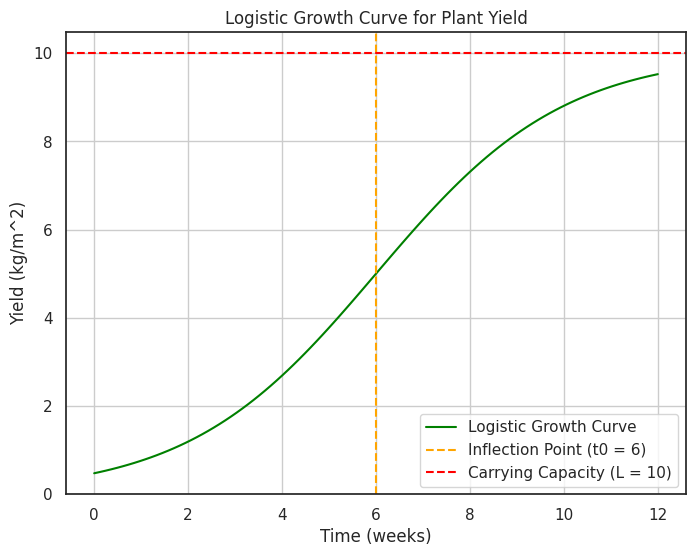

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (these should ideally be fitted to your data)
L = 10  # Example maximum yield (kg/m^2)
k = 0.5  # Growth rate
t0 = 6  # Time of fastest growth (inflection point in weeks)

# Time range (e.g., 0 to 12 weeks)
t = np.linspace(0, 12, 100)

# Logistic growth function
def logistic_growth(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

# Generate the curve
yield_curve = logistic_growth(t, L, k, t0)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(t, yield_curve, label='Logistic Growth Curve', color='green')
plt.axvline(t0, linestyle='--', color='orange', label=f'Inflection Point (t0 = {t0})')
plt.axhline(L, linestyle='--', color='red', label=f'Carrying Capacity (L = {L})')
plt.title('Logistic Growth Curve for Plant Yield')
plt.xlabel('Time (weeks)')
plt.ylabel('Yield (kg/m^2)')
plt.legend()
plt.grid()
plt.show()


In [122]:
data_ct['estimated_growth_yield_at_12_weeks'].describe()

,estimated_growth_yield_at_12_weeks
count,80.000000
mean,2.074285
std,1.169492
min,0.700000
25%,1.100000
50%,1.798037
75%,2.526813
max,5.729063


In [121]:
data_ct['growth_yield/m^2 (kg)'].describe()

,growth_yield/m^2 (kg)
count,80.000000
mean,1.045000
std,0.426095
min,0.400000
25%,0.600000
50%,1.000000
75%,1.500000
max,1.800000


In [115]:
data_ct

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max,growth_yield_true
0,lavender,14,60,40,0,2,moderate,1.35,1.750000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8,0.0
1,lavender,12,70,30,0,2,moderate,1.00,1.550000,12,82.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8,0.0
2,lavender,14,50,40,10,2,moderate,1.45,1.650000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8,0.0
3,lavender,16,65,36,0,2,moderate,1.60,1.850000,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8,0.0
4,lavender,12,60,40,0,2,moderate,1.20,1.915333,12,85.00,20.0,20.0,1.2,1.2,45.0,45.0,6.8,6.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,lavender,16,50,35,5,3,high,0.40,1.500000,5,83.65,22.0,22.0,1.2,1.2,60.0,60.0,6.2,6.2,2.8
76,lavender,17,52,30,4,2,moderate,0.50,1.500000,4,83.65,23.0,23.0,1.3,1.3,65.0,65.0,6.2,6.2,4.0
77,lavender,16,53,33,5,4,low,0.50,1.600000,5,83.65,25.0,25.0,1.4,1.4,58.0,58.0,6.3,6.3,3.5
78,lavender,16,50,32,6,3,high,0.50,1.500000,4,83.65,23.0,23.0,1.2,1.2,60.0,60.0,6.0,6.0,4.0


Mean Squared Error: 0.12334347755208326
R-squared: 0.1857151633464429


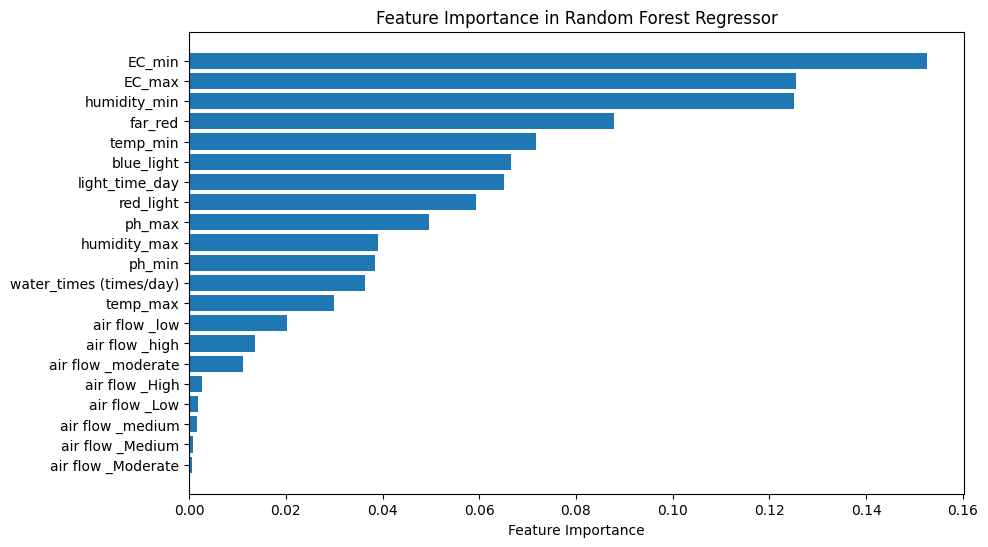

In [ ]:
# random forest

!pip install matplotlib seaborn scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target
X = data_ct[['temp_min','temp_max','EC_min','EC_max', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity_min','humidity_max', 'ph_min','ph_max', 'water_times (times/day)',
       'air flow ']]  # remove growth_time weeks
y = data_ct['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)  # You can adjust n_estimators
rf_regressor.fit(X_train, y_train)  # n_estimators = 150

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()


Confusion Matrix:
[[1 0 1 0 1]
 [0 5 0 0 0]
 [0 1 0 0 1]
 [1 1 0 1 2]
 [0 0 0 0 1]]
Accuracy: 0.5
Precision (macro-averaged): 0.48285714285714293
Recall (macro-averaged): 0.5066666666666666


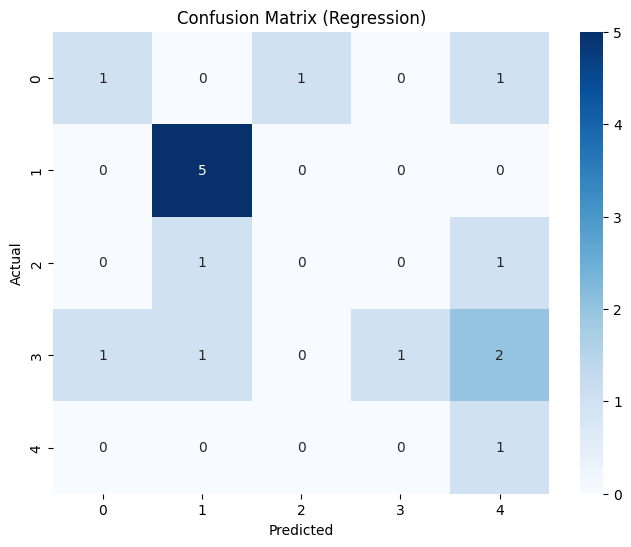

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mean Squared Error: 0.13658470827845395
R-squared: 0.0982996500732587
Confusion Matrix:
[[0 2 0 1 0]
 [1 0 3 1 0]
 [0 1 0 1 0]
 [0 1 1 2 1]
 [0 0 0 1 0]]
Accuracy: 0.125
Precision (macro-averaged): 0.06666666666666667
Recall (macro-averaged): 0.08


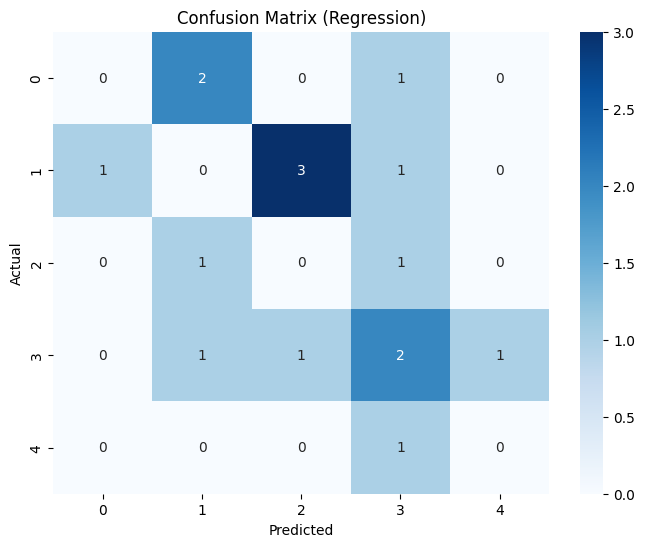

In [69]:
# with grid search

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Load the dataset
# Define features and target
X = data_ct[['temp_min','temp_max','EC_min','EC_max', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity_min','humidity_max', 'ph_min','ph_max', 'water_times (times/day)',
       'air flow ']] # remove ,'Growth Time (weeks)'
y = data_ct['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# grid search for hyperparameters

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42,n_estimators=200)


# Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,  # Use param_distributions
    n_iter=50,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


# Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# Get the best model
# best_rf_regressor = grid_search.best_estimator_

best_rf_regressor = random_search.best_estimator_


# ----> Prediction and Evaluation <----
# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ----> Confusion Matrix, Recall, Precision, Accuracy <----
# 1. Discretize (bin) the target variable
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
220 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Mean Squared Error: 0.13569361501621316
R-squared: 0.10418243970986873
Confusion Matrix:
[[0 2 1 0 0]
 [1 1 2 1 0]
 [0 1 1 0 0]
 [0 1 2 1 1]
 [0 0 0 1 0]]
Accuracy: 0.1875
Precision (macro-averaged): 0.13999999999999999
Recall (macro-averaged): 0.18


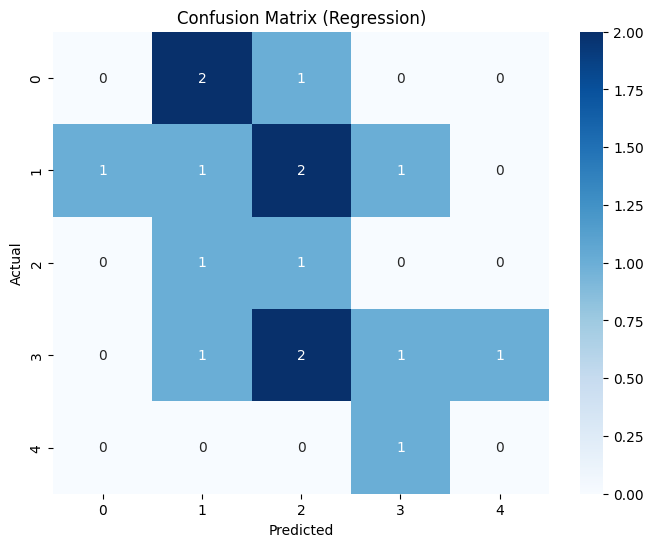

In [70]:
# random search (exhastive search )
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 'auto']
}

random_search = RandomizedSearchCV(estimator=rf_regressor,
     param_distributions=param_dist,
     n_iter=150, cv=5, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)
best_rf_regressor = random_search.best_estimator_

# ----> Prediction and Evaluation <----
# Make predictions on the test set using the best model
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# ----> Confusion Matrix, Recall, Precision, Accuracy <----
# 1. Discretize (bin) the target variable
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## try with more data

> Add blockquote



In [82]:
categorical_features = ['plant_name','air flow ','water_times (times/day)']

In [84]:
 !pip install ctgan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:00


In [85]:
 !pip install table_evaluator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 820.8/820.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully

In [87]:
for column in data.columns:
    try:
        data[column] = pd.to_numeric(data[column])
    except ValueError:
        # If conversion fails, it's likely a categorical column, so leave it as is
        pass

In [88]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True, batch_size = 100,embedding_dim=800)
ctgan.fit(data, categorical_features, epochs = 3000)

Gen. (0.25) | Discrim. (-0.28): 100%|██████████| 3000/3000 [03:58<00:00, 12.58it/s]


In [96]:
samples = ctgan.sample(300)

In [97]:
samples

,plant_name,light_time_day,red_light,blue_light,far_red,water_times (times/day),air flow,growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
0,lavender,15,61,35,3,4,low,0.924254,1.939321,3,82.889771,20.765807,25.238682,0.811805,1.680665,68.758676,64.969346,6.224481,6.240344
1,lavender,17,51,35,-1,3,High,1.568193,3.267956,10,85.451098,17.225122,23.659904,1.605644,2.539085,49.887541,60.143316,5.765812,6.353644
2,lavender,16,78,38,7,4,low,1.373367,1.738144,4,83.445937,25.329004,24.896048,1.007517,1.629510,63.305957,58.591674,6.155171,6.077014
3,lavender,14,57,25,5,4,low,1.026774,1.760671,6,83.411958,23.743056,23.607924,2.373582,1.671263,61.801089,59.940608,6.256305,6.047982
4,lavender,15,60,42,8,4,moderate,0.857603,1.731079,4,83.584031,21.268226,25.670515,1.954321,1.736688,59.799462,57.246220,6.135380,6.161717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,lavender,18,65,36,3,3,moderate,1.975280,1.725056,10,84.749748,20.232384,23.211711,2.982789,1.180554,66.956233,53.537057,5.832858,6.869800
296,lavender,14,48,22,12,2,High,0.722351,2.714238,12,87.718667,17.475485,23.111456,1.973327,2.805517,48.610887,47.786264,6.097893,6.122344
297,lavender,14,52,24,7,3,medium,0.768133,2.899139,13,82.568954,19.086277,24.357695,1.281975,3.032688,51.594351,59.930326,6.095925,5.917490
298,lavender,14,53,24,15,2,medium,0.850556,2.815635,14,84.390194,17.015831,25.406810,2.544282,2.892989,46.326377,62.571880,6.068821,6.018025


In [98]:
data.describe()


,light_time_day,red_light,blue_light,far_red,water_times (times/day),growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,14.900000,52.937500,31.925000,8.962500,2.600000,1.045000,1.915333,8.650000,83.650000,21.48750,23.600000,1.686250,1.738750,53.10000,58.375000,6.058750,6.158750
std,1.776072,6.722989,5.676456,6.017787,0.894427,0.426095,0.503404,2.968612,1.811007,2.17578,1.695862,0.473806,0.500757,8.32048,5.132115,1.039193,0.212694
min,10.000000,40.000000,20.000000,0.000000,1.000000,0.400000,1.050000,3.000000,80.000000,18.00000,20.000000,1.000000,1.000000,40.00000,45.000000,0.000000,5.800000
25%,14.000000,50.000000,28.750000,5.000000,2.000000,0.600000,1.500000,5.750000,83.650000,20.00000,23.000000,1.300000,1.300000,45.00000,55.000000,6.000000,6.000000
50%,15.500000,52.000000,32.000000,7.000000,3.000000,1.000000,1.700000,9.500000,83.650000,22.00000,24.000000,1.550000,1.600000,56.50000,60.000000,6.200000,6.150000
75%,16.000000,55.000000,36.000000,13.000000,3.000000,1.500000,2.362500,12.000000,84.000000,23.00000,25.000000,2.000000,2.000000,60.00000,62.000000,6.300000,6.200000
max,18.000000,70.000000,40.000000,20.000000,4.000000,1.800000,3.000000,12.000000,88.000000,26.00000,27.000000,2.800000,3.000000,65.00000,65.000000,8.000000,6.800000


In [99]:
samples.describe()

,light_time_day,red_light,blue_light,far_red,water_times (times/day),growth_yield/m^2 (kg),Active Agents (%),Growth Time (weeks),accuracy,temp_min,temp_max,EC_min,EC_max,humidity_min,humidity_max,ph_min,ph_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15.116667,58.026667,33.873333,9.253333,2.473333,1.050832,2.083570,9.206667,83.875559,20.475165,24.530380,1.619118,1.863824,54.163073,58.793183,6.211535,6.194802
std,2.047036,8.621701,6.894132,6.810563,0.979363,0.461717,0.568300,3.226762,1.926296,2.642515,2.253013,0.555135,0.629078,8.856623,5.499355,0.855039,0.284015
min,10.000000,35.000000,15.000000,-3.000000,1.000000,0.095075,1.086304,0.000000,77.276144,15.012766,18.416000,0.637749,0.637149,35.054511,37.776787,-0.898947,5.682008
25%,14.000000,52.000000,29.000000,4.000000,2.000000,0.679028,1.681197,8.000000,83.061337,18.319373,22.900920,1.225297,1.374368,46.252813,56.393445,5.972014,6.035020
50%,15.000000,57.000000,34.000000,7.000000,2.000000,1.033443,1.880953,10.000000,83.589718,20.671342,24.754506,1.496879,1.719453,56.024543,59.656501,6.142885,6.153873
75%,17.000000,63.000000,39.000000,13.000000,3.000000,1.434171,2.585690,12.000000,84.943209,22.494305,26.328755,1.943973,2.358511,61.868783,62.577557,6.373565,6.277289
max,19.000000,83.000000,51.000000,27.000000,4.000000,1.998972,3.469539,15.000000,89.293668,27.000761,29.043442,3.112572,3.399581,69.352117,68.680393,8.832536,7.460654


(80, 19) (300, 19)


/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:270: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


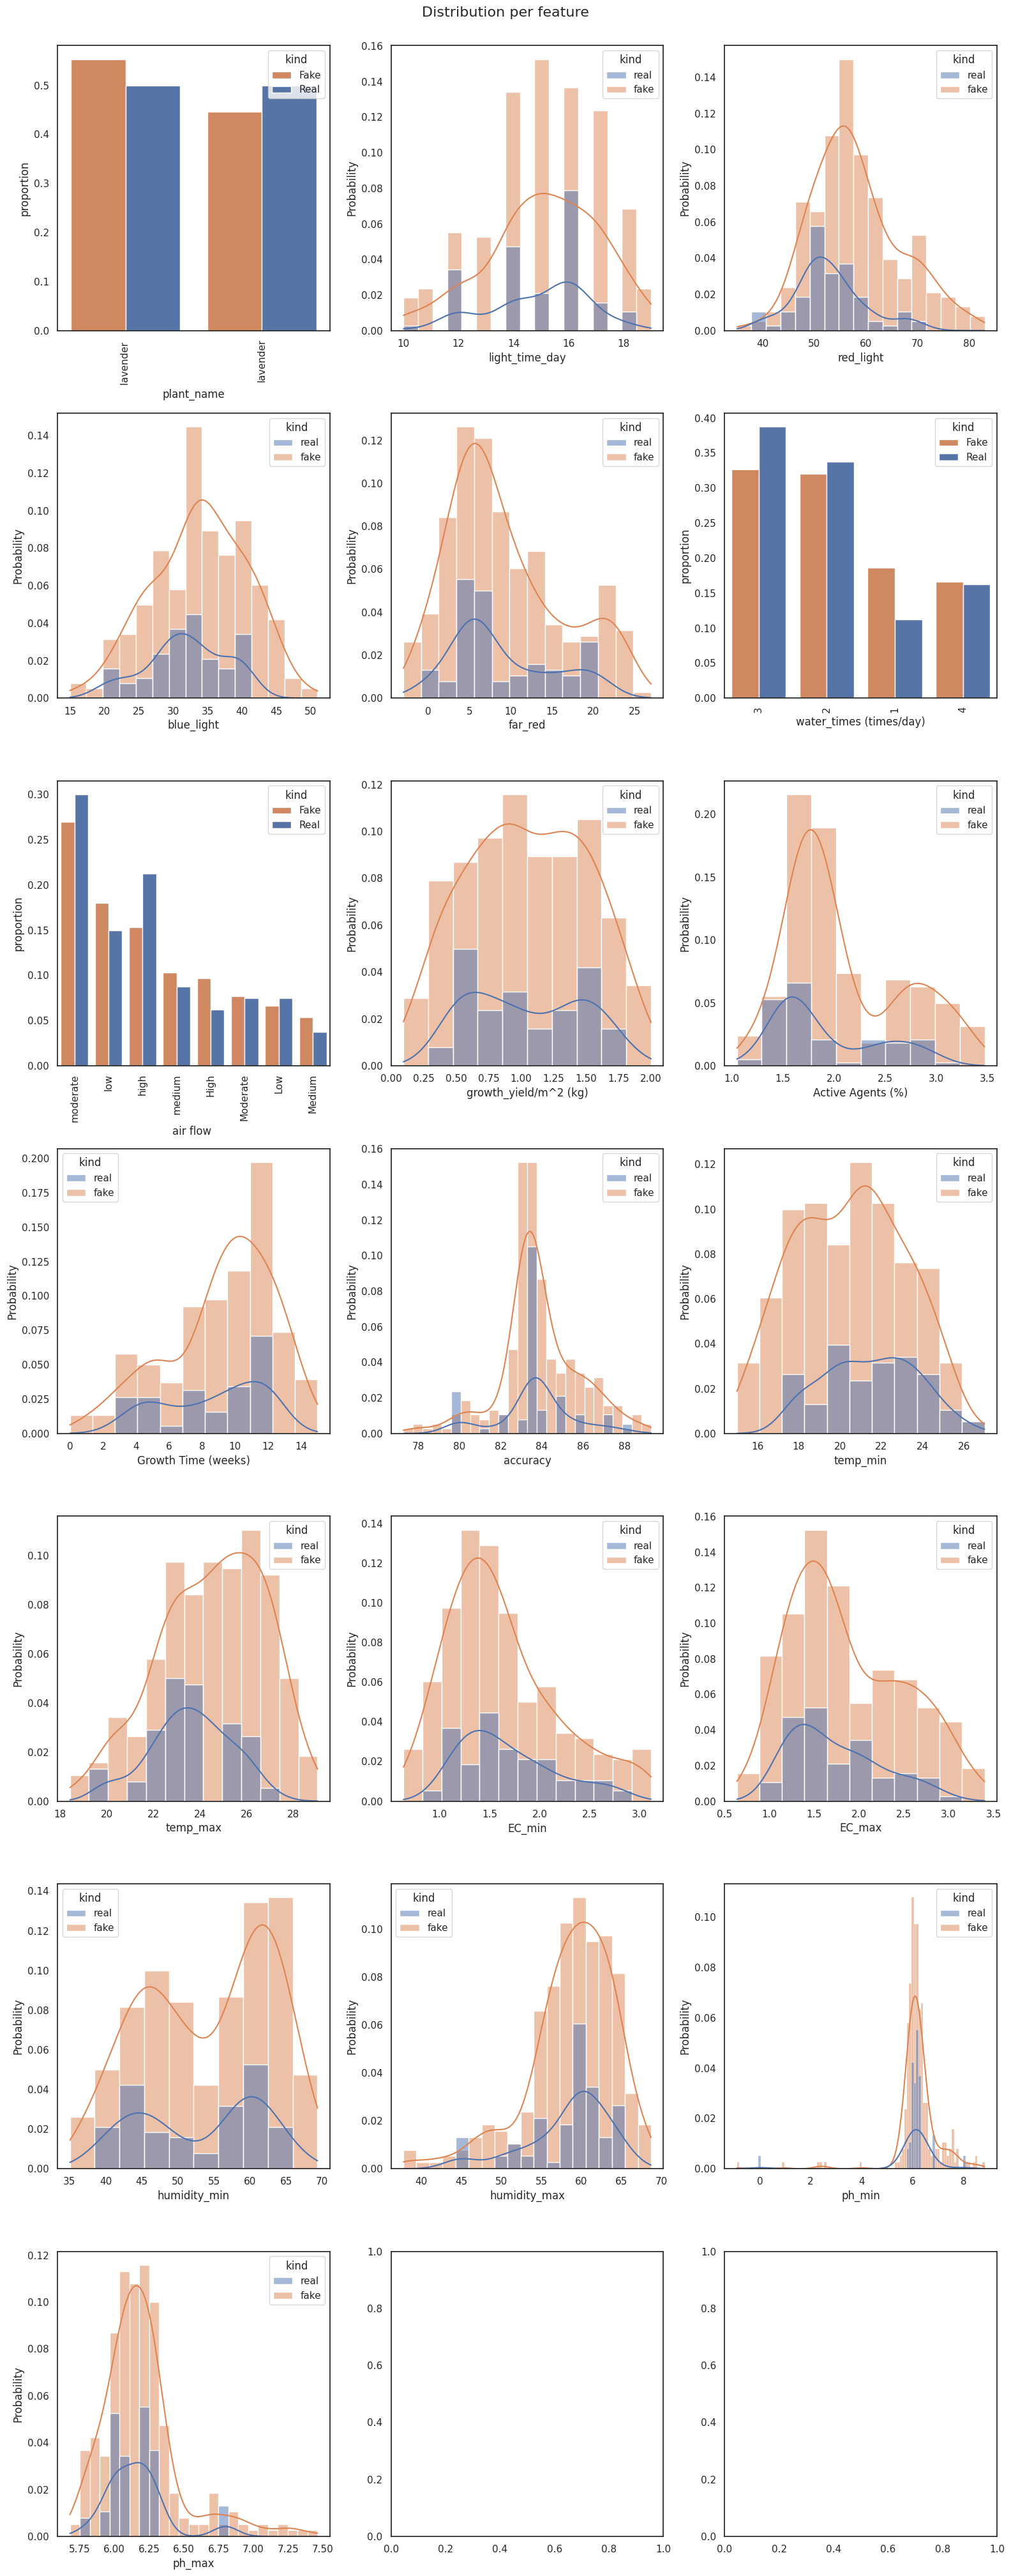

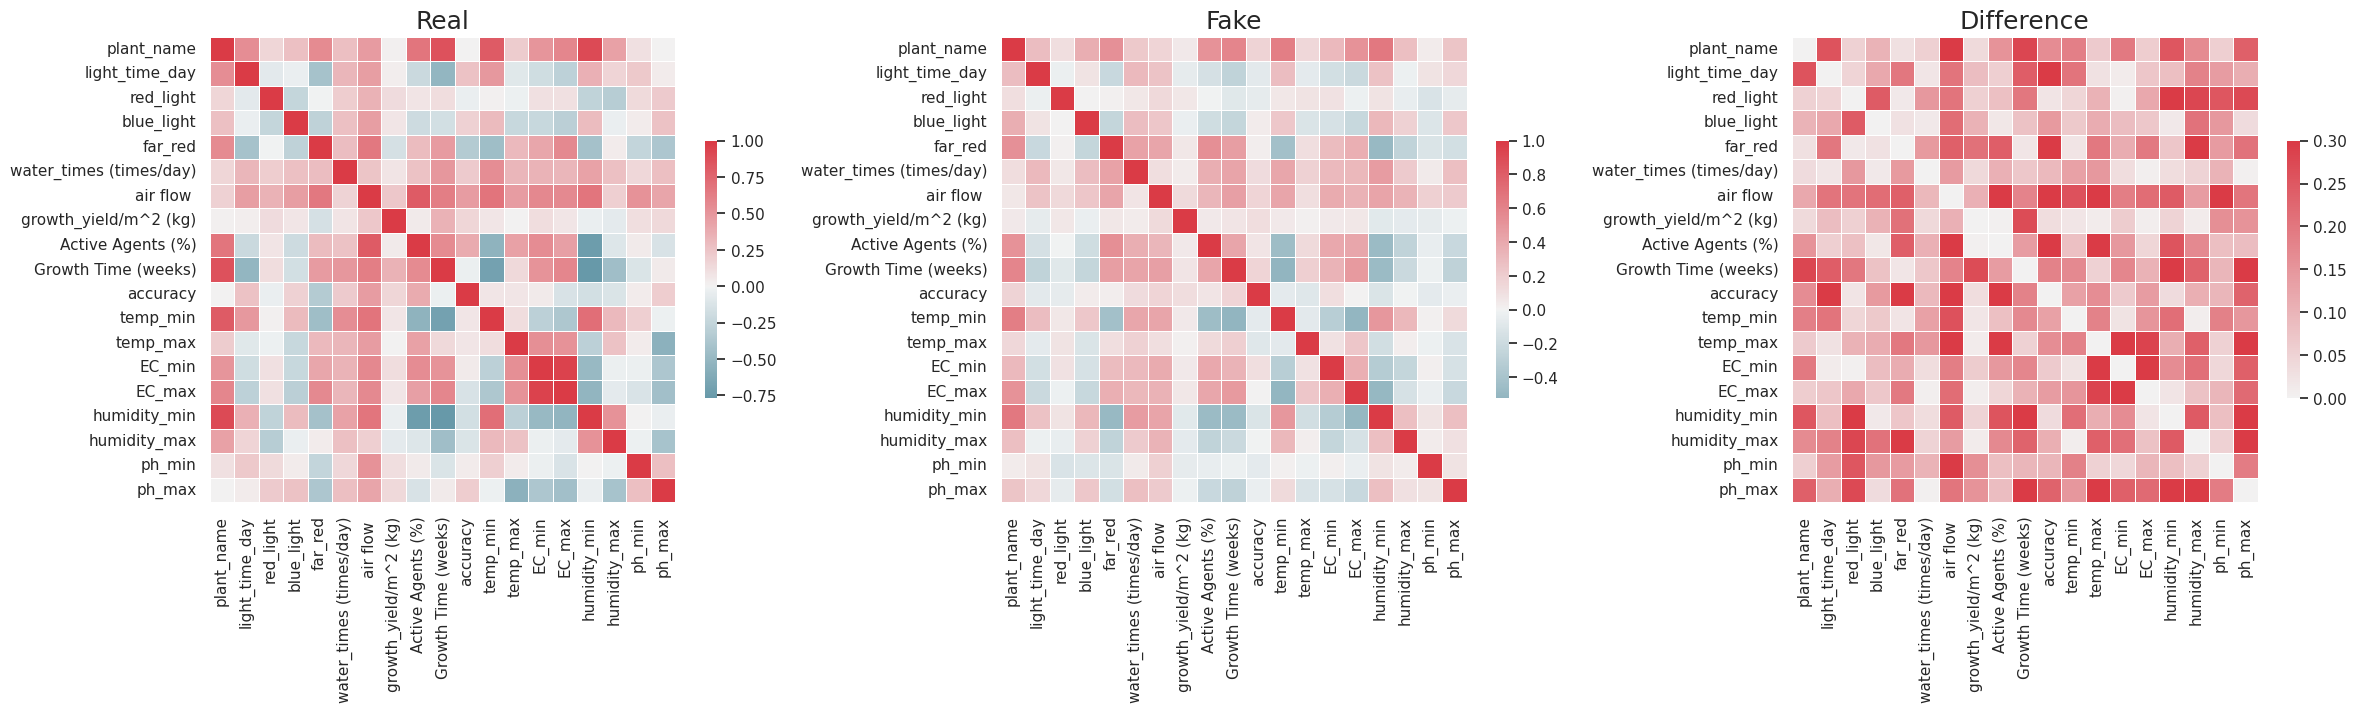

[                                     real      fake
real_data_RandomForestRegressor  0.477117  0.600432
real_data_Lasso                  0.277479  0.377195
real_data_Ridge                  0.427870  0.638871
real_data_ElasticNet             0.280318  0.377838
fake_data_RandomForestRegressor  0.338497  0.361104
fake_data_Lasso                  0.274053  0.377921
fake_data_Ridge                  0.557884  0.444533
fake_data_ElasticNet             0.275776  0.379069]


0.6428115400301877

In [102]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)
table_evaluator.plot_distributions()
table_evaluator.plot_correlation_difference()
table_evaluator.estimator_evaluation('growth_yield/m^2 (kg)', target_type='regr')


In [103]:
# Concatenate the original data and the synthetic samples
combined_data = pd.concat([data, samples], ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv('combined_plant_data_lavander.csv', index=False)

Mean Squared Error: 0.22277524708270333
R-squared: -0.15697135494034797


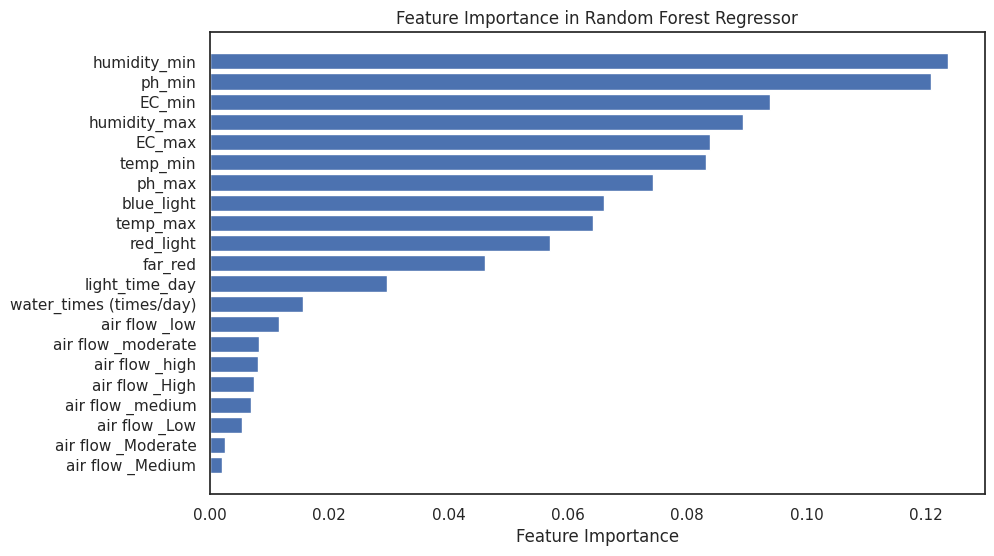

In [109]:
# random forest

!pip install matplotlib seaborn scikit-learn pandas numpy
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

combined_data = pd.read_csv('combined_plant_data_lavander.csv')


# Define features and target
X = combined_data[['temp_min','temp_max','EC_min','EC_max', 'light_time_day', 'red_light',
       'blue_light', 'far_red', 'humidity_min','humidity_max', 'ph_min','ph_max', 'water_times (times/day)',
       'air flow ']]  # remove growth_time weeks
y = combined_data['growth_yield/m^2 (kg)']

# One-hot encoding for 'air flow ' column
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_air_flow = encoder.fit_transform(X[['air flow ']])
encoded_air_flow_df = pd.DataFrame(encoded_air_flow, columns=encoder.get_feature_names_out(['air flow ']))
X = X.drop(columns=['air flow '])
X = pd.concat([X, encoded_air_flow_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)  # You can adjust n_estimators
rf_regressor.fit(X_train, y_train)  # n_estimators = 150

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()


Confusion Matrix:
[[ 0  1  4  5  0]
 [ 0  2 10 11  1]
 [ 0  5  2  8  2]
 [ 2  2  4 10  3]
 [ 0  1  1  2  0]]
Accuracy: 0.18421052631578946
Precision (macro-averaged): 0.11096681096681098
Recall (macro-averaged): 0.1354341736694678


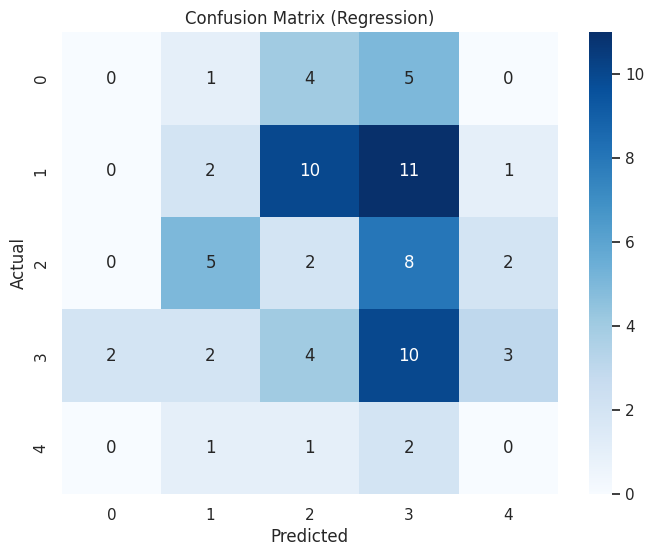

In [110]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
num_bins = 5  # Adjust the number of bins as needed
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)
y_pred_bins = pd.cut(y_pred, bins=num_bins, labels=False)

# 2. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# 3. Calculate accuracy
accuracy = accuracy_score(y_test_bins, y_pred_bins)

# 4. Calculate precision (macro-averaged)
precision = precision_score(y_test_bins, y_pred_bins, average='macro')

# 5. Calculate recall (macro-averaged)
recall = recall_score(y_test_bins, y_pred_bins, average='macro')

# Print the metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision (macro-averaged): {precision}")
print(f"Recall (macro-averaged): {recall}")

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()